In [23]:
library(randomForest)
library(caret)
library(tidyverse)
library(corrgram)
library(GGally)
data <- read.csv('KAG_conversion_data.csv', header=TRUE)
str(data)

'data.frame':	1143 obs. of  11 variables:
 $ ad_id              : int  708746 708749 708771 708815 708818 708820 708889 708895 708953 708958 ...
 $ xyz_campaign_id    : int  916 916 916 916 916 916 916 916 916 916 ...
 $ fb_campaign_id     : int  103916 103917 103920 103928 103928 103929 103940 103941 103951 103952 ...
 $ age                : chr  "30-34" "30-34" "30-34" "30-34" ...
 $ gender             : chr  "M" "M" "M" "M" ...
 $ interest           : int  15 16 20 28 28 29 15 16 27 28 ...
 $ Impressions        : int  7350 17861 693 4259 4133 1915 15615 10951 2355 9502 ...
 $ Clicks             : int  1 2 0 1 1 0 3 1 1 3 ...
 $ Spent              : num  1.43 1.82 0 1.25 1.29 ...
 $ Total_Conversion   : int  2 2 1 1 1 1 1 1 1 1 ...
 $ Approved_Conversion: int  1 0 0 0 1 1 0 1 0 0 ...


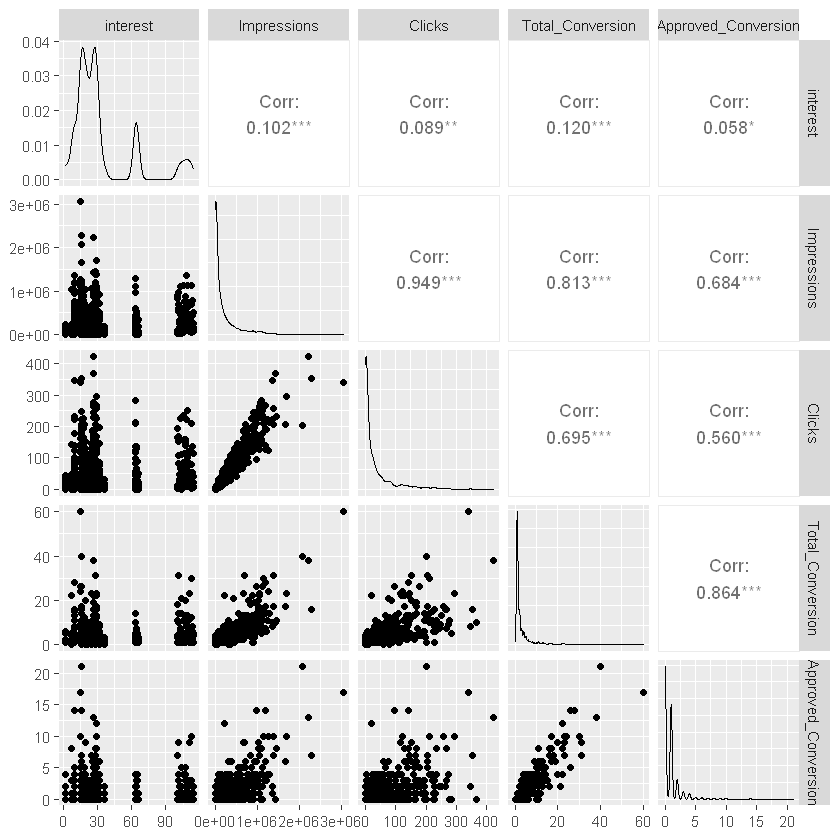

In [2]:
ggpairs(data %>% select (interest, Impressions, Clicks, Total_Conversion, Approved_Conversion))

In [3]:
# random tree forest model
# split the data into 70-30

set.seed(123)
train_idx <- sample(nrow(data), .70*nrow(data))

data_train <- data[train_idx,]
data_test <- data[-train_idx,]

str(data_train)
str(data_test)

'data.frame':	800 obs. of  11 variables:
 $ ad_id              : int  782228 950787 747852 1121100 748225 1122003 1122282 1121369 1121255 1121454 ...
 $ xyz_campaign_id    : int  936 936 936 1178 936 1178 1178 1178 1178 1178 ...
 $ fb_campaign_id     : int  116517 123558 110943 144532 111005 144691 144737 144585 144565 144599 ...
 $ age                : chr  "40-44" "30-34" "30-34" "30-34" ...
 $ gender             : chr  "F" "M" "F" "M" ...
 $ interest           : int  63 27 26 15 15 63 30 28 63 16 ...
 $ Impressions        : int  12318 199 10126 3052003 18602 975792 22859 826205 20423 75589 ...
 $ Clicks             : int  5 0 3 340 5 210 6 125 1 6 ...
 $ Spent              : num  6.34 0 4.62 639.95 8.86 ...
 $ Total_Conversion   : int  1 1 1 60 1 10 1 5 1 1 ...
 $ Approved_Conversion: int  1 0 0 17 0 4 0 1 0 1 ...
'data.frame':	343 obs. of  11 variables:
 $ ad_id              : int  708746 708771 708889 709023 709040 709059 709323 709328 709544 709614 ...
 $ xyz_campaign_id    : int

# **Random Forest**

In [4]:
# random tree forest model
set.seed(222)
rf <- randomForest(Approved_Conversion ~ ., data = data_train)
print(rf)


Call:
 randomForest(formula = Approved_Conversion ~ ., data = data_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.8803342
                    % Var explained: 64.99


In [5]:
predict00 <- predict(rf, data_train)
RMSE(predict00, data_train$Approved_Conversion/mean(data_train$Approved_Conversion))
prediction01 <- predict(rf, data_test)
RMSE(prediction01, data_test$Approved_Conversion/mean(data_test$Approved_Conversion))


[1] 0.5884841

[1] 1.028459

**Tuning the Model**

Keeping only age, gender, interest, Clicks, Spent & Total Conversion variables and getting rid of others.

In [6]:
data_train <- data_train%>%
        select(age, gender, Spent, Clicks, Approved_Conversion)
data_test <- data_test %>%
  select(age, gender, Spent, Clicks, Approved_Conversion)
head(data_train)
head(data_test)

,age,gender,Spent,Clicks,Approved_Conversion
,<chr>,<chr>,<dbl>,<int>,<int>
415,40-44,F,6.34,5,1
463,30-34,M,0.00,0,0
179,30-34,F,4.62,3,0
526,30-34,M,639.95,340,17
195,45-49,F,8.86,5,0
938,35-39,F,293.88,210,4


,age,gender,Spent,Clicks,Approved_Conversion
,<chr>,<chr>,<dbl>,<int>,<int>
1,30-34,M,1.43,1,1
3,30-34,M,0.00,0,0
7,30-34,M,4.77,3,0
12,30-34,M,0.00,0,0
14,30-34,M,0.00,0,0
15,30-34,M,10.28,7,1


In [7]:
rf_model1 <- randomForest(Approved_Conversion ~ ., data = data_train)

print(rf_model1)



Call:
 randomForest(formula = Approved_Conversion ~ ., data = data_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.463104
                    % Var explained: 41.81


In [8]:
prediction0 <- predict(rf_model1, data_train)
RMSE(prediction0, data_train$Approved_Conversion/mean(data_train$Approved_Conversion))


[1] 1.144348

In [9]:
prediction <- predict(rf_model1, data_test)

RMSE(prediction, data_test$Approved_Conversion/mean(data_test$Approved_Conversion))

[1] 1.581963

We can further check if we can predict the possibility of Approved Conversion by converting the data to factor and generating the model again.

In [10]:
data$Approved_Conversion[data$Approved_Conversion == 0] <- 0
data$Approved_Conversion[data$Approved_Conversion > 0] <- 1

data$Approved_Conversion <- as.factor(data$Approved_Conversion)
glimpse(data)


Rows: 1,143
Columns: 11
$ ad_id               <int> 708746, 708749, 708771, 708815, 708818, 708820, 70~
$ xyz_campaign_id     <int> 916, 916, 916, 916, 916, 916, 916, 916, 916, 916, ~
$ fb_campaign_id      <int> 103916, 103917, 103920, 103928, 103928, 103929, 10~
$ age                 <chr> "30-34", "30-34", "30-34", "30-34", "30-34", "30-3~
$ gender              <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", ~
$ interest            <int> 15, 16, 20, 28, 28, 29, 15, 16, 27, 28, 31, 7, 16,~
$ Impressions         <int> 7350, 17861, 693, 4259, 4133, 1915, 15615, 10951, ~
$ Clicks              <int> 1, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 7, 0, 1,~
$ Spent               <dbl> 1.43, 1.82, 0.00, 1.25, 1.29, 0.00, 4.77, 1.27, 1.~
$ Total_Conversion    <int> 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ Approved_Conversion <fct> 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,~


Split the data into test and train sets at ratio 70/30

In [11]:
set.seed(123)
index <- sample(nrow(data), 0.70*nrow(data))
train <- data[index, ]
test <- data[-index, ]

str(train)
str(test)

'data.frame':	800 obs. of  11 variables:
 $ ad_id              : int  782228 950787 747852 1121100 748225 1122003 1122282 1121369 1121255 1121454 ...
 $ xyz_campaign_id    : int  936 936 936 1178 936 1178 1178 1178 1178 1178 ...
 $ fb_campaign_id     : int  116517 123558 110943 144532 111005 144691 144737 144585 144565 144599 ...
 $ age                : chr  "40-44" "30-34" "30-34" "30-34" ...
 $ gender             : chr  "F" "M" "F" "M" ...
 $ interest           : int  63 27 26 15 15 63 30 28 63 16 ...
 $ Impressions        : int  12318 199 10126 3052003 18602 975792 22859 826205 20423 75589 ...
 $ Clicks             : int  5 0 3 340 5 210 6 125 1 6 ...
 $ Spent              : num  6.34 0 4.62 639.95 8.86 ...
 $ Total_Conversion   : int  1 1 1 60 1 10 1 5 1 1 ...
 $ Approved_Conversion: Factor w/ 2 levels "0","1": 2 1 1 2 1 2 1 2 1 2 ...
'data.frame':	343 obs. of  11 variables:
 $ ad_id              : int  708746 708771 708889 709023 709040 709059 709323 709328 709544 709614 ...
 $ xy

Again, make a random forest model.

In [12]:
set.seed(1234)
rfmodel3 <- randomForest(Approved_Conversion ~ age+gender+interest+Impressions+Clicks+Spent+Total_Conversion, train)
print(rfmodel3)


Call:
 randomForest(formula = Approved_Conversion ~ age + gender + interest +      Impressions + Clicks + Spent + Total_Conversion, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 38.88%
Confusion matrix:
    0   1 class.error
0 268 127    0.321519
1 184 221    0.454321


In [13]:
print(rfmodel3$confusion)


    0   1 class.error
0 268 127    0.321519
1 184 221    0.454321


We will check the accuracy by predicting the train and test data sets.

In [24]:
library(e1071)
set.seed(1234)
p1 <- predict(rfmodel3, train)
confusionMatrix(p1, train$Approved_Conversion)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 395  26
         1   0 379
                                          
               Accuracy : 0.9675          
                 95% CI : (0.9527, 0.9787)
    No Information Rate : 0.5062          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.935           
                                          
 Mcnemar's Test P-Value : 9.443e-07       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9358          
         Pos Pred Value : 0.9382          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4938          
         Detection Rate : 0.4938          
   Detection Prevalence : 0.5262          
      Balanced Accuracy : 0.9679          
                                          
       'Positive' Class : 0               
                              

Since we used training data to for prediction, we can see that the accuracy is quite high.
We can now check similarly using test data.

In [15]:
set.seed(1234)
p2 <- predict(rfmodel3, test)
confusionMatrix(p2, test$Approved_Conversion)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127  70
         1  37 109
                                          
               Accuracy : 0.688           
                 95% CI : (0.6361, 0.7367)
    No Information Rate : 0.5219          
    P-Value [Acc > NIR] : 2.93e-10        
                                          
                  Kappa : 0.3801          
                                          
 Mcnemar's Test P-Value : 0.001978        
                                          
            Sensitivity : 0.7744          
            Specificity : 0.6089          
         Pos Pred Value : 0.6447          
         Neg Pred Value : 0.7466          
             Prevalence : 0.4781          
         Detection Rate : 0.3703          
   Detection Prevalence : 0.5743          
      Balanced Accuracy : 0.6917          
                                          
       'Positive' Class : 0               
                              

We can plot the model

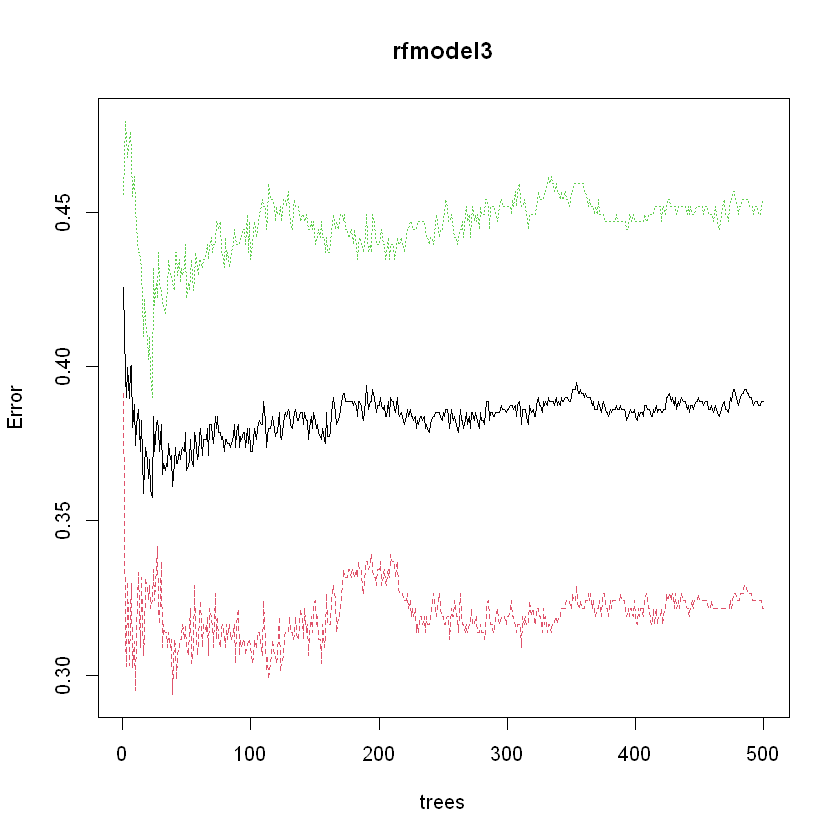

In [16]:
plot(rfmodel3)

The error tends to decrease as the number of trees increase.

## **Tuning the model**

mtry = 2  OOB error = 38.75% 
Searching left ...
mtry = 4 	OOB error = 39% 
-0.006451613 20 
Searching right ...
mtry = 1 	OOB error = 33.12% 
0.1451613 20 


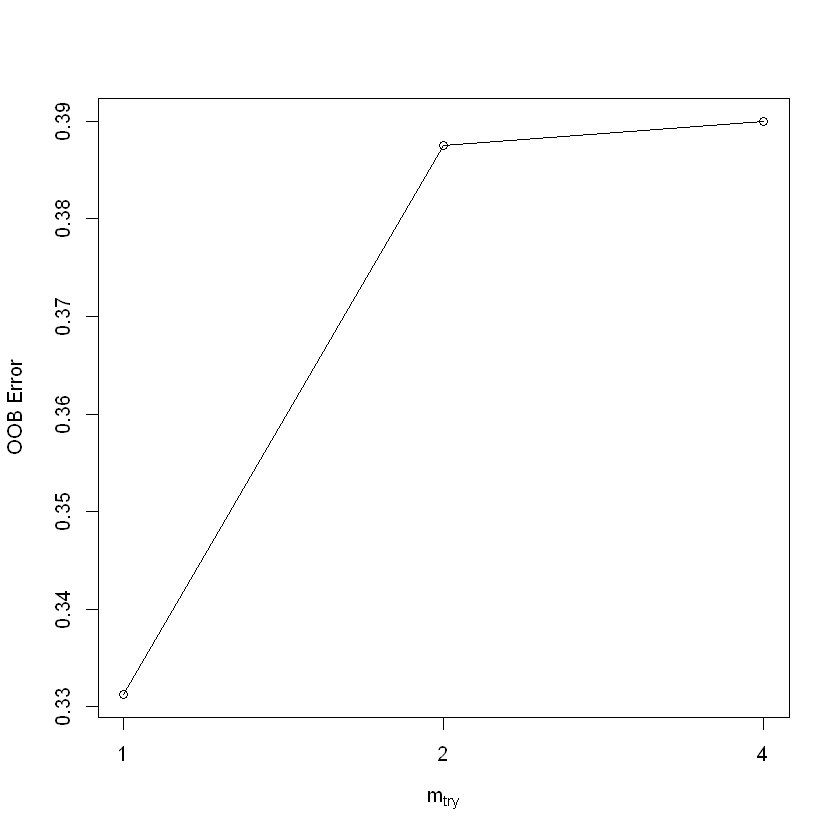

In [17]:
set.seed(1234)
t <- tuneRF(train[, 4:10], train[, 'Approved_Conversion'], stepFactor=0.6, plot=TRUE, ntreeTry=2500, trace=TRUE, improve=20)

As shown in the plot, mtry value of 1 and ntree value of 2500 will give the least error. We will tune model according this data.

In [18]:
set.seed(128)
rfmodel4 <- randomForest(Approved_Conversion ~ age+gender+interest+Impressions+Clicks+Spent+Total_Conversion, train, mtry = 1, ntree=2500, importance = TRUE, proximity = TRUE)
print(rfmodel4)


Call:
 randomForest(formula = Approved_Conversion ~ age + gender + interest +      Impressions + Clicks + Spent + Total_Conversion, data = train,      mtry = 1, ntree = 2500, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 2500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 33%
Confusion matrix:
    0   1 class.error
0 337  58   0.1468354
1 206 199   0.5086420


OOB error has come down to 33% from around 40%, after tuning the model.

In [19]:
p3<- predict(rfmodel4, train)
confusionMatrix(p3, train$Approved_Conversion)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 382 159
         1  13 246
                                         
               Accuracy : 0.785          
                 95% CI : (0.7549, 0.813)
    No Information Rate : 0.5062         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5719         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9671         
            Specificity : 0.6074         
         Pos Pred Value : 0.7061         
         Neg Pred Value : 0.9498         
             Prevalence : 0.4938         
         Detection Rate : 0.4775         
   Detection Prevalence : 0.6763         
      Balanced Accuracy : 0.7872         
                                         
       'Positive' Class : 0              
                                         

In [20]:
p4<- predict(rfmodel4, test)
confusionMatrix(p4, test$Approved_Conversion)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 141  82
         1  23  97
                                          
               Accuracy : 0.6939          
                 95% CI : (0.6421, 0.7422)
    No Information Rate : 0.5219          
    P-Value [Acc > NIR] : 6.848e-11       
                                          
                  Kappa : 0.3957          
                                          
 Mcnemar's Test P-Value : 1.512e-08       
                                          
            Sensitivity : 0.8598          
            Specificity : 0.5419          
         Pos Pred Value : 0.6323          
         Neg Pred Value : 0.8083          
             Prevalence : 0.4781          
         Detection Rate : 0.4111          
   Detection Prevalence : 0.6501          
      Balanced Accuracy : 0.7008          
                                          
       'Positive' Class : 0               
                              

After tuning the model and predicting the test data we can see that the accuracy of the model has further improved. Values for attributes such as Sensitivity and Specificity have also improved.

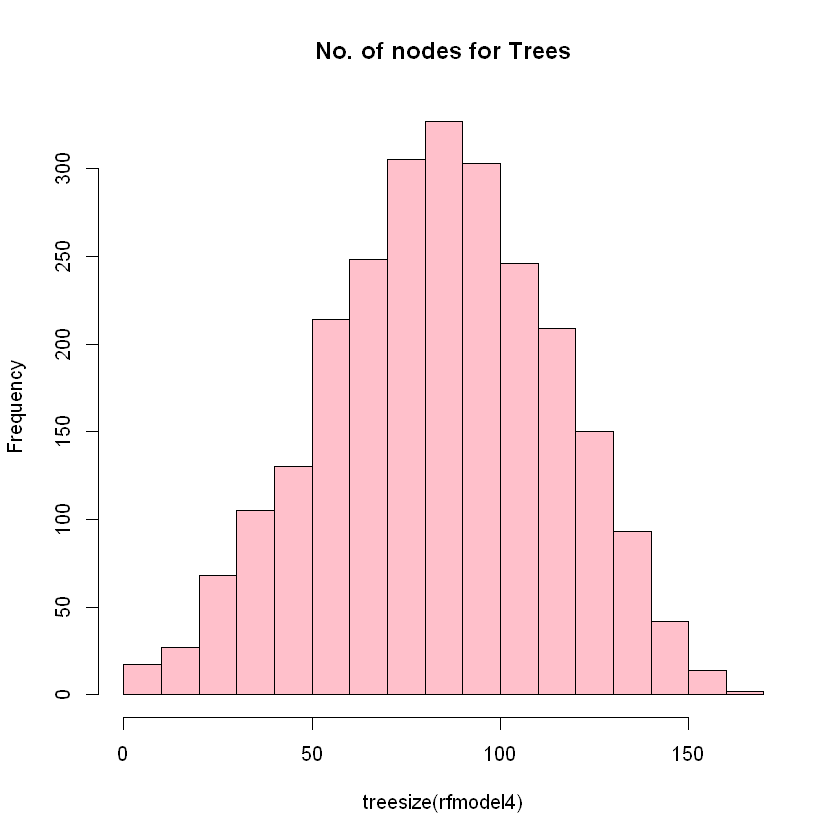

In [21]:
hist(treesize(rfmodel4), main='No. of nodes for Trees', col = 'pink')

We can see from the histogram, on an average there are >300 nodes per tree

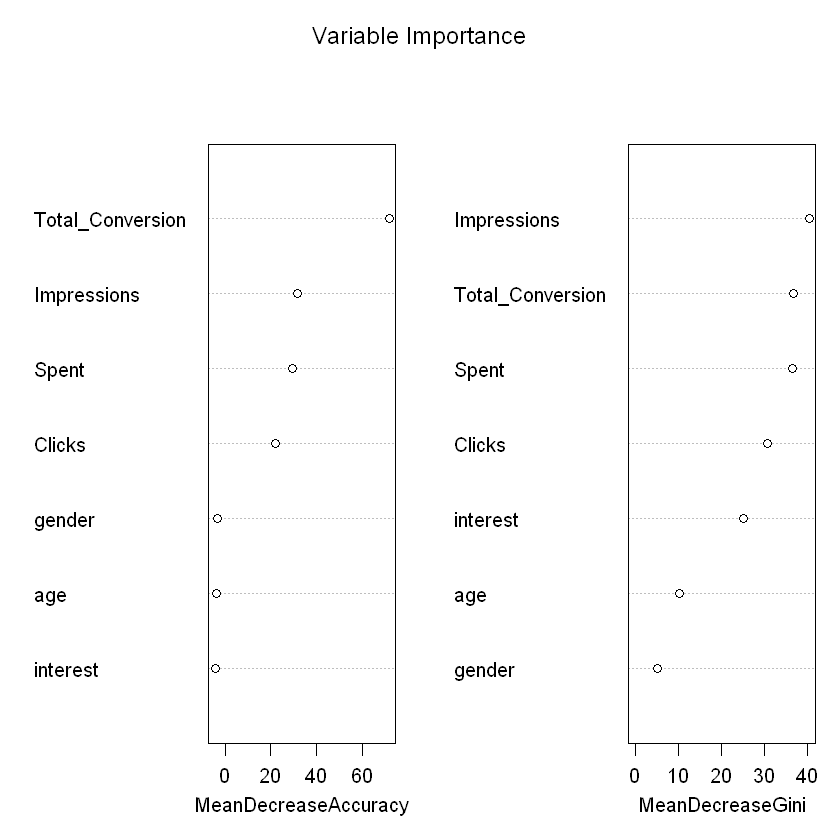

In [22]:
varImpPlot(rfmodel4, main='Variable Importance')

Plot shows how worse the model will perform without each variable. Simply put, we can say that Total_Conversion has maximum importance in predicting Approved_Conversion. Contribution of interest is very low.
